# Your own Kernel Ridge Regresion

## Exercise 5
Given three training samples with feature matrix $\mathbf{X}=(-1,0,1)$ and target vector $\mathbf{y}=(2,3,2)^T$, Gaussian Kernel with $\sigma=1$ and $\lambda=0$, implement the following in `numpy`:
* Generate vector $\mathbf{x}$ of 100 samples from interval $[-1.25,1.25]$
* Calculate and plot the kernels $\kappa(x,x_i)=\exp(-\frac{(x-x_i)^2}{2\sigma})$ for samples $\mathbf{x}$
* Calculate dual representation $\mathbf{a}=(\mathbf{K}-\lambda\mathbf{I})^{-1}\mathbf{y}$ 
* Calculate and plot the Kernel Ridge Regression model $\hat{y}=\sum_{i=1}^N\kappa(x,x_i)a_i$ for samples $\mathbf{x}$

*Hint:* Use `np.linspace`,`np.linalg.inv` and `np.matmul`

### Imports and functions
Run the code in the cell bellow. It load the python libraries and implements the funcion to evaluate Gaussian kernel.

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# a function to calculate the kernel is prepared for you
def GaussKernel(f,mu,sigma):
    kernel = norm.pdf((f-mu)/sigma)
    kernel = kernel/norm.pdf(0)
    return kernel

### Dataset
Next, let's create our dataset. Run the cell bellow to see it plotted.

(0, 3.5)

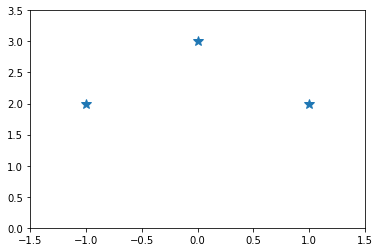

In [2]:
# data
X = np.array([-1,0,1]).reshape(-1,1)
y = np.array([2,3,2])
plt.plot(X,y,'*',markersize = 10,label = 'data')

#axis
plt.xlim([-1.5,1.5])
plt.ylim([0,3.5])

### Gaussian kernels

In the cell bellow we will 
* define our feature space `x`, a 100 samples from -1.25 to 1.25. 
* calculate Gaussian kernels $\kappa(x,x_i)$ placed around our sample features $x_i$. Use funcion `GaussKernel` to do that.

(0, 3.5)

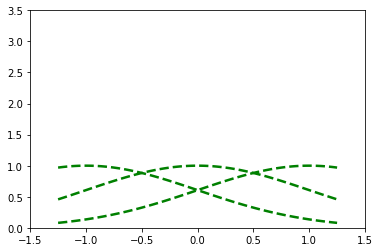

In [3]:
#sigma
sigma = 1

# vector x of 100 samples
x = np.linspace(-1.25,1.25,100)

# generate kernel for X[0] and plot
kernel1 = GaussKernel(x,X[0],sigma)
plt.plot(x,kernel1,'g--',linewidth = 2.5)

# generate kernel for X[1] and plot
kernel2 = GaussKernel(x,X[1],sigma)
plt.plot(x,kernel2,'g--',linewidth = 2.5)

# generate kernel for X[2] and plot
kernel3 = GaussKernel(x,X[2],sigma)
plt.plot(x,kernel3,'g--',linewidth = 2.5)

# set axis
plt.xlim([-1.5,1.5])
plt.ylim([0,3.5])

### Dual representation

Now we calculate dual representation $\mathbf{a}$. Perform following steps:
* Calculate Gram matrix $\mathbf{K}$ with elements $\kappa(x_i,x_j)$. Use function `GaussKernel`.
* Calculate $(\mathbf{K}+\lambda\mathbf{I})^{-1}$ using `np.linalg.inv`
* Calculate dual representation $\mathbf{a}=(\mathbf{K}+\lambda\mathbf{I})^{-1}\mathbf{y}$ using `np.matmul`

In [8]:
# lambda
l=0

# calculate Gram matrix K
K=np.zeros([3,3])
for i in range(3):
    for j in range(3):
        K[i,j]=GaussKernel(X[i],X[j],sigma)

# calculate dual representation a
I = np.eye(3)
Kinv = np.linalg.inv(K+l*I)
a = np.matmul(Kinv,y)
print('Dual representation: ',np.around(a,2))

[[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]
Dual representation:  [0.45 2.45 0.45]


### Predicted model

Calculate the predicted model as $\hat{y}=\sum_{i=1}^N\kappa(x,x_i)a_i$ using the kernels that you already created above.

(0, 3.5)

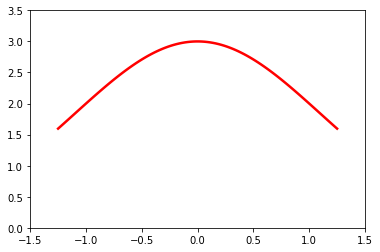

In [5]:
# calculate model y_pred
y_pred=a[0]*kernel1+a[1]*kernel2+a[2]*kernel3
plt.plot(x,y_pred,'r',label = 'model',linewidth = 2.5)

# set axis
plt.xlim([-1.5,1.5])
plt.ylim([0,3.5])

### Final plot

Run the code bellow to produce the final plot.

(0, 3.5)

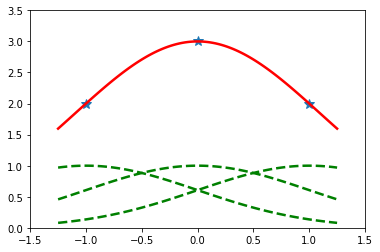

In [6]:
# data 
plt.plot(X,y,'*',markersize = 10,label = 'data')

# kernels
plt.plot(x,kernel1,'g--',linewidth = 2.5)
plt.plot(x,kernel2,'g--',linewidth = 2.5)
plt.plot(x,kernel3,'g--',linewidth = 2.5)

# predicted model
plt.plot(x,y_pred,'r',label = 'model',linewidth = 2.5)

# axis
plt.xlim([-1.5,1.5])
plt.ylim([0,3.5])